# **Instituto de Informática - UFG**

Disciplina: Inteligência Artificial

Prof. Cedric Luiz de Carvalho

Grupo ( A )

---


Aluna(o): Luana Guedes Barros Martins

---

Aluna(o): Ruan Chaves Rodrigues

---

Aluna(o): Thiago Monteles de Souza

---

# Atividade Prática 06 - Processamento de Linguagem Natural

Particionamento das atividades:
- Luana Guedes Barros Martins: Desenvolvedor
- Ruan Chaves Rodrigues: Analista de dados
- Thiago Monteles de Souza: Gerente do Projeto

In [1]:
!pip install gensim

In [12]:
!python -m spacy download pt_core_news_sm

✔ Download and installation successful
You can now load the model via spacy.load('pt_core_news_sm')


In [20]:
!pip install nltk
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/luana/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [42]:
# Imports

from collections import defaultdict
from gensim import corpora, models, similarities
from gensim.utils import simple_preprocess
import numpy as np

## Descrição do Problema

Utilizando as técnicas estudadas, será desenvolvido uma ferramenta que permita a comparação de pequenos textos. Devem ser definidas métricas de comparação que classifique os textos segundo critérios de similaridade.

A ferramenta deverá ser aplicada aos Estudos Dirigidos desenvolvidos ao longo do curso de Inteligência Artificial 2019-3. Para cada estudo, deve-se construir uma matriz que mostre a similaridade entre os documentos. Depois, definir um documento de referência e traçar um gráfico de similaridade dos demais em relação a ele.

## Tratamento dos Dados

In [97]:
import pandas as pd
import spacy 

stopwords = nltk.corpus.stopwords.words('portuguese')
nlp = spacy.load("pt_core_news_sm")
docs = pd.read_csv("Dados - ED05.csv", sep=";").values.flatten().tolist()
ids = pd.read_csv("Dados - ED05.csv", sep=";").values
ids = [ [(idx2, idx) for idx,v in enumerate(v2) ] for idx2,v2 in enumerate(ids) ]
ids = [x for y in ids for x in y ]
ids
docs = [nlp(x) for x in docs]
docs = [ [ y for y in x if y.is_punct == False and y.text.lower() not in stopwords] for x in docs ]
tokens = [ [ y.lemma_ for y in x ] for x in docs ]

[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 9),
 (0, 10),
 (0, 11),
 (0, 12),
 (0, 13),
 (0, 14),
 (0, 15),
 (0, 16),
 (0, 17),
 (0, 18),
 (0, 19),
 (0, 20),
 (0, 21),
 (0, 22),
 (0, 23),
 (0, 24),
 (0, 25),
 (0, 26),
 (0, 27),
 (0, 28),
 (0, 29),
 (0, 30),
 (0, 31),
 (0, 32),
 (0, 33),
 (0, 34),
 (0, 35),
 (0, 36),
 (0, 37),
 (0, 38),
 (0, 39),
 (0, 40),
 (1, 0),
 (1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (1, 7),
 (1, 8),
 (1, 9),
 (1, 10),
 (1, 11),
 (1, 12),
 (1, 13),
 (1, 14),
 (1, 15),
 (1, 16),
 (1, 17),
 (1, 18),
 (1, 19),
 (1, 20),
 (1, 21),
 (1, 22),
 (1, 23),
 (1, 24),
 (1, 25),
 (1, 26),
 (1, 27),
 (1, 28),
 (1, 29),
 (1, 30),
 (1, 31),
 (1, 32),
 (1, 33),
 (1, 34),
 (1, 35),
 (1, 36),
 (1, 37),
 (1, 38),
 (1, 39),
 (1, 40),
 (2, 0),
 (2, 1),
 (2, 2),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (2, 7),
 (2, 8),
 (2, 9),
 (2, 10),
 (2, 11),
 (2, 12),
 (2, 13),
 (2, 14),
 (2, 15),
 (2, 16),
 (2, 17),
 (2, 18),
 (2, 19),
 (2, 20),


In [39]:
from collections import Counter
counter = dict(Counter([ x for y in tokens for x in y ]))
low_freq = [x for x in counter.keys() if counter[x] == 1]
tokens = [ x for x in tokens if x not in low_freq ]

In [61]:
token_docs = [ ' '.join(x) for x in tokens ]
mydict = corpora.Dictionary([simple_preprocess(line) for line in token_docs])
nf = len(mydict.dfs)

In [52]:
corpus = [mydict.doc2bow(simple_preprocess(line)) for line in token_docs]

In [53]:
for doc in corpus:
    print([[mydict[id], freq] for id, freq in doc])

[['aprendizado', 1], ['aquisição', 1], ['artificiar', 1], ['capacidade', 1], ['conhecimento', 1], ['cérebro', 1], ['desenvolvimento', 1], ['estruturar', 1], ['funcionamento', 1], ['humanar', 2], ['inspiração', 1], ['nervoso', 1], ['neural', 1], ['objetivo', 1], ['principal', 1], ['rede', 1], ['simular', 1], ['sistema', 1]]
[['artificial', 1], ['cada', 1], ['diferente', 1], ['executam', 1], ['executar', 1], ['função', 1], ['funções', 1], ['lógicas', 1], ['matemático', 1], ['modelo', 1], ['neurônio', 1], ['neurônios', 1], ['pode', 1], ['simples', 1]]
[['neurônios', 1], ['axônio', 2], ['captar', 1], ['celular', 3], ['coleta', 1], ['combina', 1], ['componentes', 1], ['condução', 1], ['corpo', 3], ['dendritos', 3], ['desses', 1], ['distantes', 1], ['estímulos', 2], ['gerar', 1], ['impulsos', 2], ['informações', 1], ['locais', 1], ['nervosos', 1], ['novos', 1], ['outros', 2], ['passado', 1], ['podem', 1], ['principais', 1], ['processa', 1], ['recebidas', 1], ['recebidos', 1], ['responsáveis'

## Definição do Modelo

In [58]:
tfidf = models.TfidfModel(corpus)

In [59]:
for doc in tfidf[corpus]:
    print([[mydict[id], np.around(freq, decimals=2)] for id, freq in doc])

[['aprendizado', 0.13], ['aquisição', 0.26], ['artificiar', 0.19], ['capacidade', 0.22], ['conhecimento', 0.24], ['cérebro', 0.18], ['desenvolvimento', 0.3], ['estruturar', 0.22], ['funcionamento', 0.24], ['humanar', 0.47], ['inspiração', 0.27], ['nervoso', 0.2], ['neural', 0.18], ['objetivo', 0.23], ['principal', 0.17], ['rede', 0.1], ['simular', 0.22], ['sistema', 0.17]]
[['artificial', 0.28], ['cada', 0.11], ['diferente', 0.23], ['executam', 0.47], ['executar', 0.31], ['função', 0.11], ['funções', 0.28], ['lógicas', 0.39], ['matemático', 0.25], ['modelo', 0.32], ['neurônio', 0.09], ['neurônios', 0.07], ['pode', 0.28], ['simples', 0.22]]
[['neurônios', 0.03], ['axônio', 0.18], ['captar', 0.16], ['celular', 0.31], ['coleta', 0.13], ['combina', 0.13], ['componentes', 0.16], ['condução', 0.12], ['corpo', 0.3], ['dendritos', 0.38], ['desses', 0.16], ['distantes', 0.16], ['estímulos', 0.27], ['gerar', 0.07], ['impulsos', 0.25], ['informações', 0.12], ['locais', 0.16], ['nervosos', 0.13], 

In [62]:
index = similarities.SparseMatrixSimilarity(tfidf[corpus], num_features=nf)

In [65]:
dataplot = []
for item in corpus:
    dataplot.append(index[tfidf[item]])

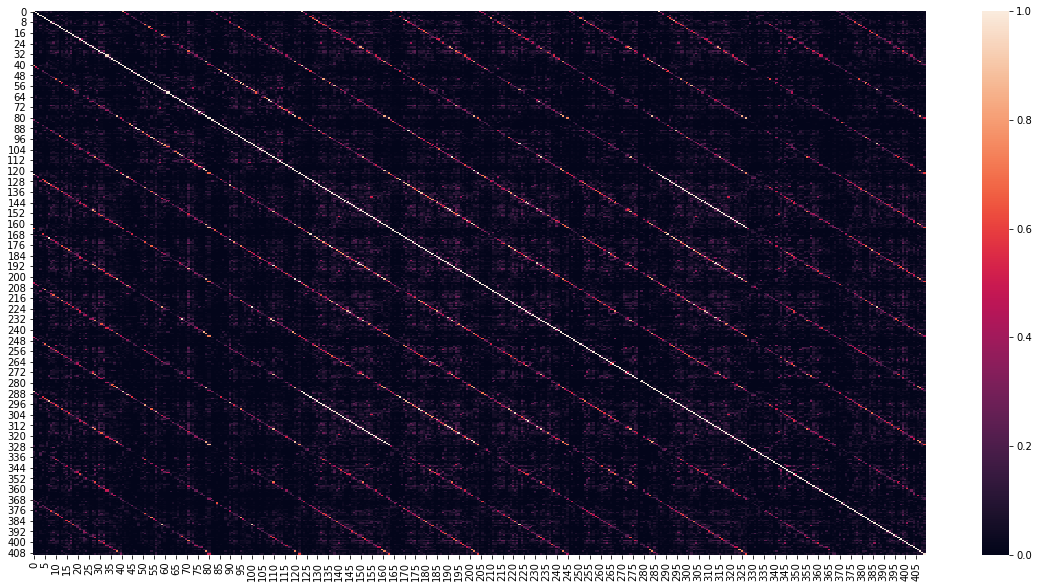

In [77]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

import seaborn as sns
sns.heatmap(pd.DataFrame(dataplot))

In [80]:
df = pd.DataFrame(dataplot)

In [98]:
tmp = df.applymap(lambda x: 'nan' if x < 0.9 else x)
arr = tmp.values.tolist()
matches = []
for idx, item in enumerate(arr):
    for idx2, item2 in enumerate(item):
        if idx != idx2 and arr[idx][idx2] != 'nan':
            matches.append([idx, idx2])

In [104]:
pairs = [ [ ids[x][0] for x in y ] for y in matches ]
pairs[0:10]

[[0, 3],
 [0, 7],
 [0, 3],
 [0, 4],
 [0, 7],
 [0, 0],
 [0, 0],
 [1, 3],
 [1, 7],
 [1, 2]]

In [111]:
dict_pairs = dict(Counter([ tuple(x) for x in pairs ])).items()

dict_pairs

dict_items([((0, 3), 2), ((0, 7), 2), ((0, 4), 1), ((0, 0), 2), ((1, 3), 1), ((1, 7), 1), ((1, 2), 8), ((1, 9), 1), ((1, 1), 4), ((1, 5), 1), ((2, 1), 8), ((2, 4), 4), ((2, 5), 2), ((2, 9), 1), ((2, 3), 1), ((2, 7), 1), ((3, 0), 2), ((3, 1), 1), ((3, 7), 41), ((3, 4), 8), ((3, 5), 3), ((3, 2), 1), ((4, 3), 8), ((4, 7), 10), ((4, 0), 1), ((4, 2), 4), ((4, 6), 1), ((4, 5), 2), ((5, 7), 4), ((5, 2), 2), ((5, 9), 1), ((5, 3), 3), ((5, 4), 2), ((5, 1), 1), ((6, 4), 1), ((7, 0), 2), ((7, 1), 1), ((7, 3), 41), ((7, 4), 10), ((7, 5), 4), ((7, 2), 1), ((9, 1), 1), ((9, 2), 1), ((9, 5), 1)])

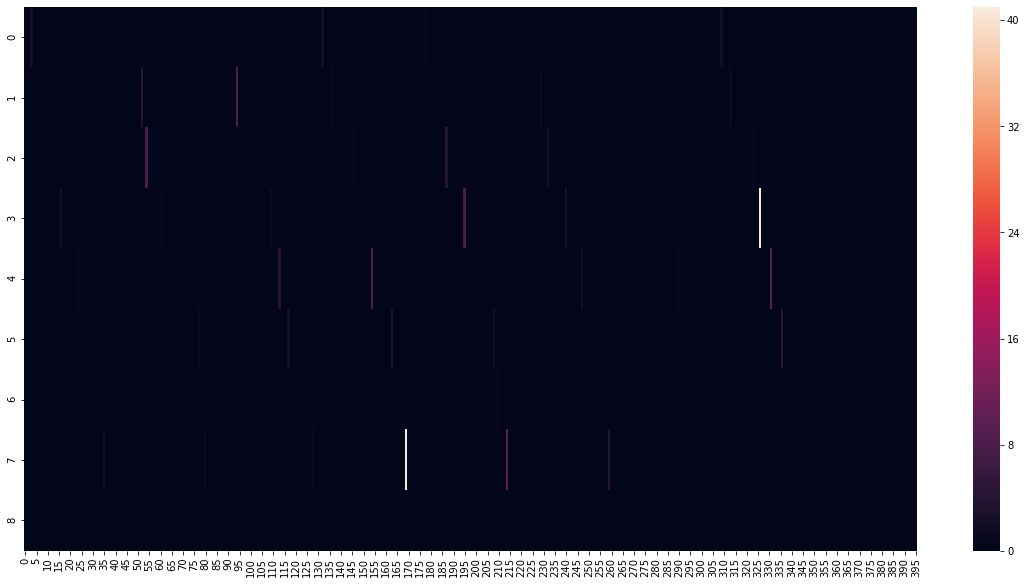

In [110]:
sns.heatmap(dataplot)